In [1]:
!pip install pandas-datareader
!pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
import yfinance as yf
import math

In [3]:
df_precios = pd.DataFrame()

In [4]:
activos=['BIMBOA.MX','LIVEPOLC-1.MX','GCARSOA1.MX']


In [17]:
for i in activos:
    df_precios[i]=pd.DataFrame(yf.Ticker(i).history(start='2022-01-01', end='2024-04-30')['Close'])
df_precios

,BIMBOA.MX,LIVEPOLC-1.MX,GCARSOA1.MX
Date,,,
2022-01-03 00:00:00-06:00,60.029415,81.000290,63.036057
2022-01-04 00:00:00-06:00,60.452221,81.782097,63.474213
2022-01-05 00:00:00-06:00,58.607235,81.828629,60.923168
2022-01-06 00:00:00-06:00,61.201744,83.420166,60.806328
2022-01-07 00:00:00-06:00,61.960892,82.238152,59.589230
...,...,...,...
2024-04-15 00:00:00-06:00,66.112770,131.349960,137.850006
2024-04-16 00:00:00-06:00,66.803703,134.631027,137.009995
2024-04-17 00:00:00-06:00,65.263901,136.011993,136.759995


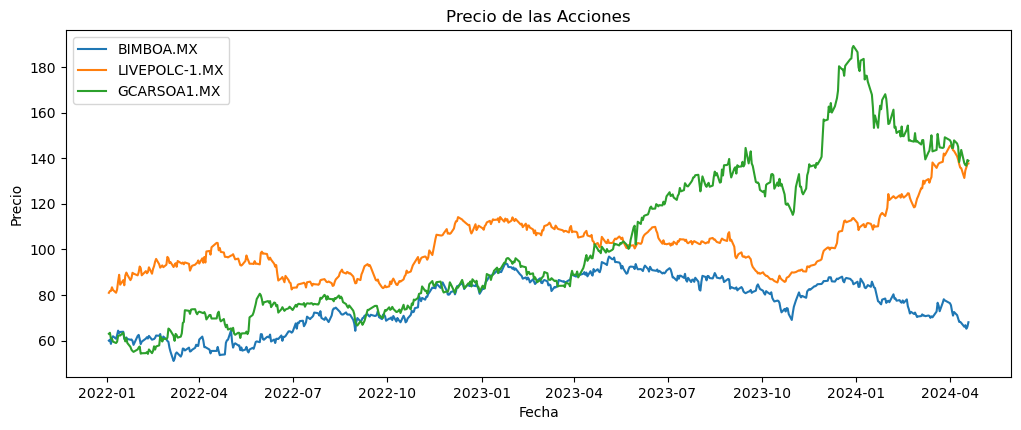

In [18]:
plt.figure(figsize=(12.2,4.5))
for i in df_precios.columns.values:
    plt.plot(df_precios[i], label=i)
plt.title('Precio de las Acciones')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend(df_precios.columns.values)
    

In [29]:
#Calcula los rendimientos así se puede agregar a la tabla para que queden todos los datos juntos.
#df_precios['BIMBOA_rend']=np.log(df_precios['BIMBOA.MX']).diff()
#df_precios

In [19]:
df_precios_ren=np.log(df_precios).diff()
df_precios_ren

,BIMBOA.MX,LIVEPOLC-1.MX,GCARSOA1.MX
Date,,,
2022-01-03 00:00:00-06:00,NaN,NaN,NaN
2022-01-04 00:00:00-06:00,0.007019,0.009606,0.006927
2022-01-05 00:00:00-06:00,-0.030995,0.000569,-0.041020
2022-01-06 00:00:00-06:00,0.043318,0.019263,-0.001920
2022-01-07 00:00:00-06:00,0.012328,-0.014271,-0.020219
...,...,...,...
2024-04-15 00:00:00-06:00,-0.025355,-0.032354,-0.041214
2024-04-16 00:00:00-06:00,0.010397,0.024673,-0.006112
2024-04-17 00:00:00-06:00,-0.023319,0.010205,-0.001826


In [41]:
df_precios_ren.shape

(581, 3)

In [20]:
#función para quitar los valores missing
#Si ve un missing borra toda la fila
df_precios_ren=df_precios_ren.dropna()
df_precios_ren

,BIMBOA.MX,LIVEPOLC-1.MX,GCARSOA1.MX
Date,,,
2022-01-04 00:00:00-06:00,0.007019,0.009606,0.006927
2022-01-05 00:00:00-06:00,-0.030995,0.000569,-0.041020
2022-01-06 00:00:00-06:00,0.043318,0.019263,-0.001920
2022-01-07 00:00:00-06:00,0.012328,-0.014271,-0.020219
2022-01-10 00:00:00-06:00,-0.017996,-0.014707,-0.009852
...,...,...,...
2024-04-15 00:00:00-06:00,-0.025355,-0.032354,-0.041214
2024-04-16 00:00:00-06:00,0.010397,0.024673,-0.006112
2024-04-17 00:00:00-06:00,-0.023319,0.010205,-0.001826


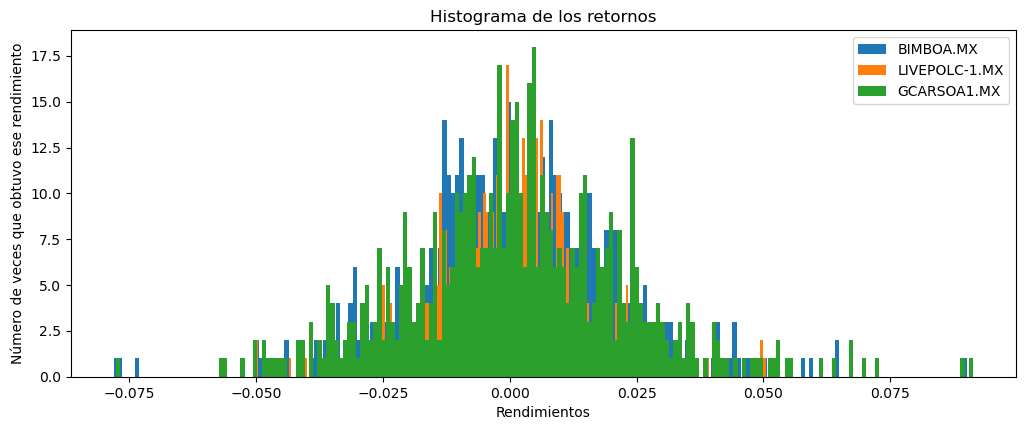

In [21]:
plt.figure(figsize=(12.2,4.5))
for i in df_precios_ren.columns.values:
    plt.hist(df_precios_ren[i], label=i, bins=200)
plt.title('Histograma de los retornos')
plt.xlabel('Rendimientos')
plt.ylabel('Número de veces que obtuvo ese rendimiento')
plt.legend(df_precios_ren.columns.values)

#log(obs)/log(2) se redondea y será el rango

In [22]:
#Estimadores
#252 porque son los días hábiles para así saberlos anuales
media=df_precios_ren.mean().values*252
varianza=df_precios_ren.var().values*252
DesEstandar=np.sqrt(varianza)
matrix_cov=df_precios_ren.cov()*252

In [23]:
print('Rendimiento de las acciones \n',media,'\n')
print('Varianza de las acciones \n',varianza,'\n')
print('Desviación estándar de las acciones \n',DesEstandar,'\n')
print('Matriz de varianzas y covarianzas \n')
print(matrix_cov)

Rendimiento de las acciones 
 [0.05513412 0.23185942 0.34504666] 

Varianza de las acciones 
 [0.10165345 0.05280481 0.12434907] 

Desviación estándar de las acciones 
 [0.31883138 0.22979297 0.35263164] 

Matriz de varianzas y covarianzas 

               BIMBOA.MX  LIVEPOLC-1.MX  GCARSOA1.MX
BIMBOA.MX       0.101653       0.011901     0.038405
LIVEPOLC-1.MX   0.011901       0.052805     0.011000
GCARSOA1.MX     0.038405       0.011000     0.124349


In [24]:
#La desviación estándar es lo que conocemos como volatilidad

#### Portafolio para 2 activos

In [25]:
#Rendimientos
rend_act1=media[0]
rend_act2=media[1]
print(rend_act1)
print(rend_act2)

#Varianza
var_act1=varianza[0]
var_act2=varianza[1]
print(var_act1)
print(var_act2)

#Desviación estándar Volatilidad
de_act1=DesEstandar[0]
de_act2=DesEstandar[1]
print(de_act1)
print(de_act2)

#Covarianza
cov_12=matrix_cov.loc['BIMBOA.MX','LIVEPOLC-1.MX'] #Es la cov del 1 con el 2
cc_12=cov_12/(de_act1*de_act2) #Coeficiente de correlación de Pearson
print(cc_12)




0.055134116420436176
0.23185942176502713
0.10165344936376798
0.05280480681450744
0.3188313807700992
0.22979296511100475
0.1624370736147592


In [26]:
w1=np.arange(0,1.01,0.01)
w2=[1-i for i in w1]

<function matplotlib.pyplot.show(close=None, block=None)>

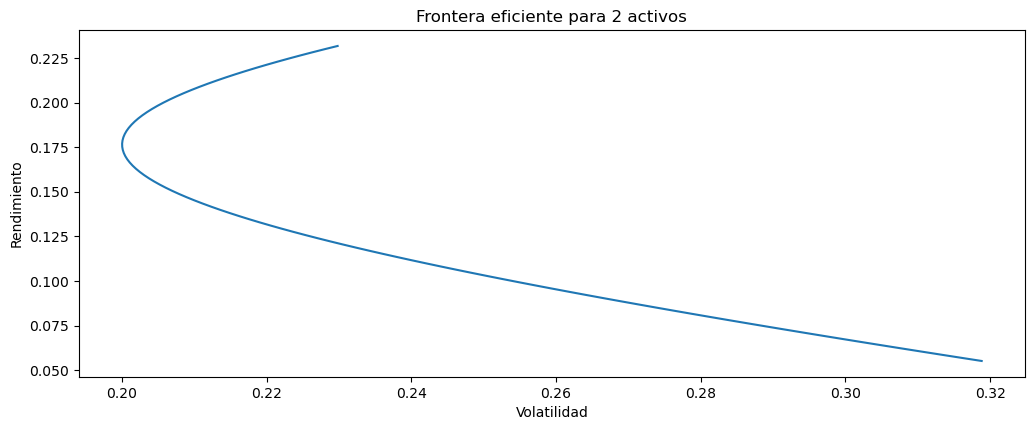

In [27]:
rendimiento_P=[]
volatilidad_P=[]

for i in range(len(w1)):
    rendimiento_P.append(w1[i]*rend_act1+w2[i]*rend_act2)
    volatilidad_P.append(np.sqrt((w1[i]**2)*(var_act1)+((w2[i]**2)*(var_act2))+2*(w1[i]*w2[i]*cov_12)))

plt.figure(figsize=(12.2,4.5))
plt.plot(volatilidad_P,rendimiento_P)
plt.title('Frontera eficiente para 2 activos')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
plt.show
  

#### Clase 2 de mayo

In [28]:
#3 activos
#Portafolio sencillo

capital=2000000

#Porcentaje a invertir en cada activo
w_port_sencillo=[0.25,0.4,0.35]

#Último precio observado
precios=[df_precios.loc['2024-04-19 00:00:00-06:00',df_precios.columns[i]] for i in range(len(df_precios.columns))]

#Monto que tenemos que invertir en cada activo
montos=[capital*i for i in w_port_sencillo]

#Número de activos
n_activos=[math.floor(i/j) for i,j in zip(montos,precios)]

#Monto real
monto_real=[i*j for i,j in zip(precios,n_activos)]

#Tabla

Port_sencillo=pd.DataFrame(zip(activos, precios, n_activos, monto_real,w_port_sencillo ),columns=['Activos','Precios','No. de activos','Monto','Wi'])
print(Port_sencillo)

#Rendimientos 
media

#Matriz de varianzas y covarianzas
matrix_cov

#Rendimiento del portafolio
rend_port_sencillo=media @ w_port_sencillo
print('\nEl rendimiento del portafolio es de:',rend_port_sencillo )


#Volatilidad del portafolio
de_port_sencillo=np.sqrt(w_port_sencillo @ matrix_cov @ w_port_sencillo)
print('La volatilidad del portafolio es de:',de_port_sencillo )

#Cociente de Sharpe
Sharpe_port_sencillo=rend_port_sencillo/de_port_sencillo
print('El cociente de Sharpe del portafolio es de :',Sharpe_port_sencillo )




         Activos     Precios  No. de activos          Monto    Wi
0      BIMBOA.MX   68.106613            7341  499970.647202  0.25
1  LIVEPOLC-1.MX  137.735779            5808  799969.403320  0.40
2    GCARSOA1.MX  138.899994            5039  699917.069244  0.35

El rendimiento del portafolio es de: 0.22729362952554455
La volatilidad del portafolio es de: 0.2054654070965033
El cociente de Sharpe del portafolio es de : 1.1062379440778025


In [57]:
#Para buscar valores dentro de la tabla
#El -1 es que trae la última fila
#El 0 es de la primera columna

print(df_precios.iloc[-1,0])
print(df_precios.iloc[-1,1])
print(df_precios.iloc[-1,2])

#Otra manera de hacerlo
print(df_precios.loc['2024-04-19 00:00:00-06:00','BIMBOA.MX'])


68.10661315917969
137.73577880859375
138.89999389648438
68.10661315917969


In [59]:
precios=[df_precios.loc['2024-04-19 00:00:00-06:00',df_precios.columns[i]] for i in range(len(df_precios.columns))]

In [61]:
precios

[68.10661315917969, 137.73577880859375, 138.89999389648438]

#### Portafolio de mínima varianza

In [112]:
#Si las w son negativas tenemos ventas en corto
#Las ventas en corto pides prestado, comprar las acciones y en ese momento las vendes

In [44]:
#Portafolio mínimo varianza

capital=2000000
n=3 #Número de activos

vector_unos=[1]*n #Son 3 porque son 3 activos
#Porcentaje a invertir en cada activo
w_port_min_var=(np.linalg.inv(matrix_cov) @ vector_unos)/(vector_unos @ np.linalg.inv(matrix_cov) @ vector_unos)

#Último precio observado
precios=[df_precios.loc['2024-04-19 00:00:00-06:00',df_precios.columns[i]] for i in range(len(df_precios.columns))]

#Monto que tenemos que invertir en cada activo
montos=[capital*i for i in w_port_min_var]

#Número de activos
n_activos=[math.floor(i/j) for i,j in zip(montos,precios)]

#Monto real
monto_real=[i*j for i,j in zip(precios,n_activos)]

#Tabla

Port_min_var=pd.DataFrame(zip(activos, precios, n_activos, monto_real,w_port_min_var ),columns=['Activos','Precios','No. de activos','Monto','Wi'])
print(Port_min_var)

#Rendimientos 
media

#Matriz de varianzas y covarianzas
matrix_cov

#Rendimiento del portafolio
rend_port_min_var=media @ w_port_min_var
print('\nEl rendimiento del portafolio es de:',rend_port_min_var )


#Volatilidad del portafolio
de_port_min_var=np.sqrt(w_port_min_var @ matrix_cov @ w_port_min_var)
print('La volatilidad del portafolio es de:',de_port_min_var )

#Cociente de Sharpe
Sharpe_port_min_var=rend_port_min_var/de_port_min_var
print('El cociente de Sharpe del portafolio de min. var es de :',Sharpe_port_min_var )


         Activos     Precios  No. de activos         Monto        Wi
0      BIMBOA.MX   68.106613            6568  4.473242e+05  0.223685
1  LIVEPOLC-1.MX  137.735779            8790  1.210697e+06  0.605356
2    GCARSOA1.MX  138.899994            2461  3.418329e+05  0.170959

El rendimiento del portafolio es de: 0.21167900400967396
La volatilidad del portafolio es de: 0.19107164423947373
El cociente de Sharpe del portafolio de min. var es de : 1.1078514808004303


#### Cociente de Sharpe 

rendimiento/volatilidad

Portafolio de máximo cociente de sharpe

Se maximiza el cociente


In [46]:
#Portafolio máximo cociente de sharpe

capital=2000000
n=3 #Número de activos

vector_unos=[1]*n #Son 3 porque son 3 activos
#Porcentaje a invertir en cada activo
w_port_max_sharpe=(np.linalg.inv(matrix_cov) @ media)/(vector_unos @ np.linalg.inv(matrix_cov) @ media)

#Último precio observado
precios=[df_precios.loc['2024-04-19 00:00:00-06:00',df_precios.columns[i]] for i in range(len(df_precios.columns))]

#Monto que tenemos que invertir en cada activo
montos=[capital*i for i in w_port_max_sharpe]

#Número de activos
n_activos=[math.floor(i/j) for i,j in zip(montos,precios)]

#Monto real
monto_real=[i*j for i,j in zip(precios,n_activos)]

#Tabla

Port_max_sharpe=pd.DataFrame(zip(activos, precios, n_activos, monto_real,w_port_max_sharpe ),columns=['Activos','Precios','No. de activos','Monto','Wi'])
print(Port_max_sharpe)

#Rendimientos 
media

#Matriz de varianzas y covarianzas
matrix_cov

#Rendimiento del portafolio
rend_port_max_sharpe=media @ w_port_max_sharpe
print('\nEl rendimiento del portafolio es de:',rend_port_max_sharpe )


#Volatilidad del portafolio
de_port_max_sharpe=np.sqrt(w_port_max_sharpe @ matrix_cov @ w_port_max_sharpe)
print('La volatilidad del portafolio es de:',de_port_max_sharpe )

#Cociente de Sharpe
Sharpe_port_max_sharpe=rend_port_max_sharpe/de_port_max_sharpe
print('El cociente de Sharpe del portafolio de max. sharpe es de :',Sharpe_port_max_sharpe )


         Activos     Precios  No. de activos         Monto        Wi
0      BIMBOA.MX   68.106613           -4840 -3.296360e+05 -0.164797
1  LIVEPOLC-1.MX  137.735779           10120  1.393886e+06  0.696982
2    GCARSOA1.MX  138.899994            6735  9.354915e+05  0.467814

El rendimiento del portafolio es de: 0.3139337898476972
La volatilidad del portafolio es de: 0.23268928259703292
El cociente de Sharpe del portafolio de max. sharpe es de : 1.3491544876665509


In [119]:
#El portafolio que tenga el cociente de Sharpe más alto en el de mínima varianza es el que saca el 10

In [48]:
#Portafolio de mínimo riesgo con el rendimiento deseado

A=vector_unos @ np.linalg.inv(matrix_cov) @ vector_unos
B=vector_unos @ np.linalg.inv(matrix_cov) @ media
C=media @ np.linalg.inv(matrix_cov) @ media

rend_deseado=np.arange(0,1.01,0.01)
lamnbda = [(C-B*i)/(A*C-B**2) for i in rend_deseado]

LA=[i*A for i in lamnbda]
nB=[1-i for i in LA]

for k in range(len(w_port_min_var)):
    globals()["w_min_esp_"+str(k+1)]=[i*w_port_min_var[k]+j*w_port_max_sharpe[k] for i,j in zip(LA,nB)]
    

v_w=[]
for i in range(len(w_min_esp_1)):
    v_w.append([w_min_esp_1[i],w_min_esp_2[i],w_min_esp_3[i]])

rend_port_min_esp=[i @ media for i in v_w]
de_port_min_esp=[i @ matrix_cov @ i for i in v_w]


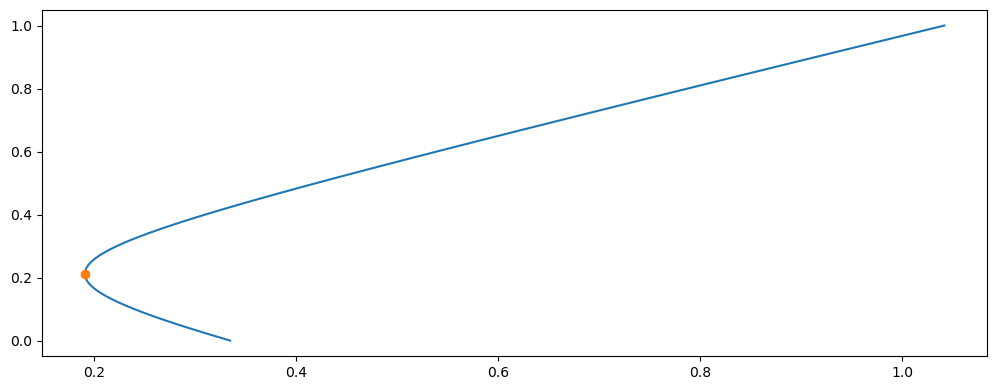

In [50]:
plt.figure(figsize=(12.2,4.5))
plt.plot(np.sqrt(de_port_min_esp),rend_port_min_esp)
plt.plot(de_port_min_var,rend_port_min_var,'o')

### Portafolio de tangencia

In [70]:
#Portafolio sin riesgo
w_sin_riesgo=[0.15,0.35,0.50]
r_sin_riesgo=np.array([0.15,0.11,0.12])

rend_port_rf=w_sin_riesgo @ r_sin_riesgo

print(rend_port_rf)


0.121


In [77]:
#Portafolio de tangencias o de mercado
print('Portafolio de tangencia o de mercado \n')

vector_unos=[1,1,1]
matrix_cov_inv=np.linalg.inv(matrix_cov)

F=[i- rend_port_rf for i in media]

w_port_tan=(matrix_cov_inv @ F)/(vector_unos @ matrix_cov_inv @ F)

#Monto de inversión en cada activo
montos_port_tan=[capital*i for i in w_port_tan]

#Número de activos
n_activos_port_tan=[math.floor(i/j) for i,j in zip(montos_port_tan,precios)]

#Monto real
monto_real_port_tan=[i*j for i,j in zip(precios,n_activos_port_tan)]

#Port_tan=pd.DataFrame(zip(df_precios.columns,precios,n_activos_port_tan,montos_port_tan,monto_real_port_tan,w_port_tan),columns=['Activos','Precio','# Activos','Monto','Monto Real','Wi'])
Port_tan=pd.DataFrame(zip(activos,precios,n_activos_port_tan,montos_port_tan,monto_real_port_tan,w_port_tan),columns=['Activos','Precio','# Activos','Monto','Monto Real','Wi'])
Port_tan['Precio']=Port_tan['Precio'].apply('${:.2f}'.format)
Port_tan['# Activos']=Port_tan['# Activos'].apply('${:,.0f}'.format)
Port_tan['Monto']=Port_tan['Monto'].apply('${:,.0f}'.format)
Port_tan['Monto Real']=Port_tan['Monto Real'].apply('${:,.2f}'.format)
Port_tan['Wi']=Port_tan['Wi'].apply('${:.1%}'.format)                      
                      
print(Port_tan,'\n')

#Rendimiento del portafolio máximo cociente de sharp
rend_port_tan=w_port_tan @ media
print(f"El rendimiento esperado del portafolio es de:{rend_port_tan:.4%}")
                      
#Varianza portafolio máximo cociente de sharpe
var_port_tan=w_port_tan @ matrix_cov @ w_port_tan
print(f"La varianza esperada del portafolio es de:{var_port_tan:.4%}")


#Volatilidad portafolio máximo cociente de sharpe
de_port_tan=np.sqrt(var_port_tan)
print(f"La volatilidad del portafolio es de:{de_port_tan : .4%}" )

#Coeficiente de Sharpe
Sharpe_port_tan=rend_port_tan/de_port_tan
print(f"El portafolio tiene un cociente de Sharpe de: {Sharpe_port_tan:.5}" )

                      
#Sharpe ajustado
sharpe_ajus_port_tan=(rend_port_tan - rend_port_rf)/de_port_tan
print(f"El portafolio tiene un cociente de Sharpe ajustado de : {sharpe_ajus_port_tan:.5}")

Portafolio de tangencia o de mercado 

         Activos   Precio # Activos        Monto      Monto Real       Wi
0      BIMBOA.MX   $68.11  $-20,063  $-1,366,356  $-1,366,422.98  $-68.3%
1  LIVEPOLC-1.MX  $137.74   $11,895   $1,638,493   $1,638,367.09   $81.9%
2    GCARSOA1.MX  $138.90   $12,439   $1,727,863   $1,727,777.02   $86.4% 

El rendimiento esperado del portafolio es de:45.0380%
La varianza esperada del portafolio es de:13.2612%
La volatilidad del portafolio es de: 36.4160%
El portafolio tiene un cociente de Sharpe de: 1.2368
El portafolio tiene un cociente de Sharpe ajustado de : 0.90449


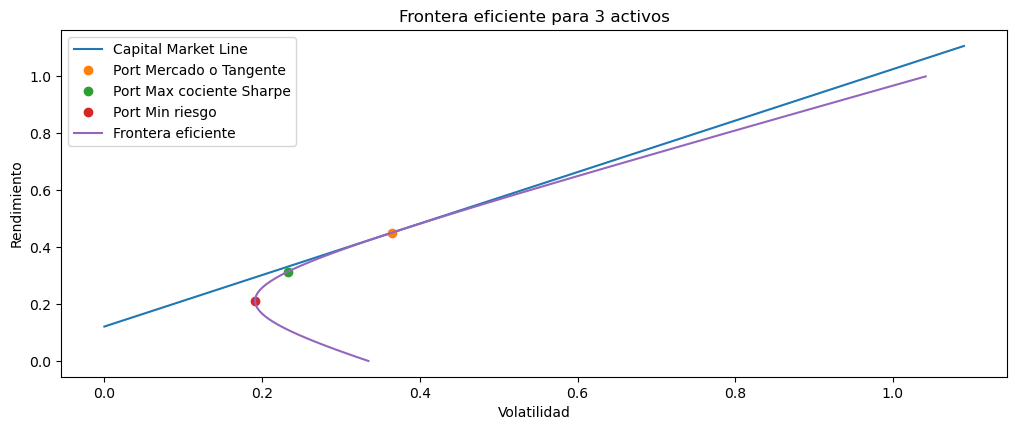

In [84]:
plt.figure(figsize=(12.2,4.5))

plt.plot(vol_cml,rfr)
plt.plot(de_port_tan,rend_port_tan,'o')
plt.plot(de_port_max_sharpe,rend_port_max_sharpe,'o')
plt.plot(de_port_min_var,rend_port_min_var,'o')
plt.plot(np.sqrt(de_port_min_esp),rend_port_min_esp)

plt.title('Frontera eficiente para 3 activos')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
plt.legend(['Capital Market Line','Port Mercado o Tangente','Port Max cociente Sharpe','Port Min riesgo','Frontera eficiente'])
plt.show()




In [82]:
#Capital Market Line
vol_cml=np.arange(0,1.1,0.01)
rfr=[rend_port_rf+(sharpe_ajus_port_tan*i) for i in vol_cml]

In [145]:
de_deseada=0.20
CML=pd.DataFrame(zip(rfr,vol_cml),columns=['ren','vol'])
CML.set_index('vol',inplace=True)
print('Rendimiento con la volatilidad deseada es de', CML.loc[de_deseada,'ren'])

Rendimiento con la volatilidad deseada es de 0.29006508141167153


In [96]:
w_PA=de_deseada/de_port_tan
w_Arf=1-w_PA
print('Porcentaje en el portafolio de acciones',w_PA)
print('Porcentaje en el portafolio de activos libres de riesgo',w_Arf)

NameError: name 'de_deseada' is not defined

In [94]:
#Portafolio deseado sobre la CML

activos_rf=['Arf1','Arf2','Arf3']

activos_np=activos+activos_rf

monto_por_r=[capital*i*w_PA for i in w_port_tan]
monto_por_rf=[capital*i*w_Arf for i in w_sin_riesgo]

montos_np=monto_por_r + monto_por_rf
rend_np = media.tolist() + r_sin_riesgo.tolist() 

w_np=[i/capital for i in montos_np]

rend_port_np = np.array(rend_np)@w_np
rend_port_np

print(activos_np)
print(w_np)
print(f"El rendimiento del portafolio es de {rend_port_np:.4%}")


NameError: name 'w_PA' is not defined